In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/divyansh/mlprojects/Countryclusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [4]:
df['Language']=df['Language'].map({'English':0,'French':1,'German':2})
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


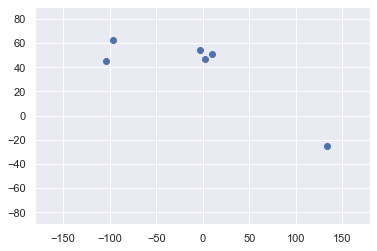

In [5]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

In [6]:
x= df.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [7]:
k_means=KMeans(3,random_state=42)

In [8]:
k_means.fit(x)

KMeans(n_clusters=3, random_state=42)

In [9]:
identified_cluster = k_means.fit_predict(x)
identified_cluster

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [10]:
data_with_cluster = df.copy()
data_with_cluster['Cluster'] =  identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


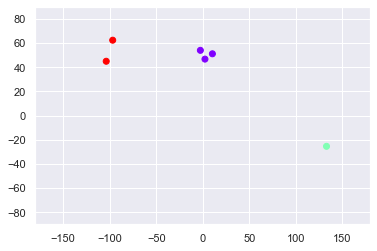

In [11]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

In [12]:
k_means.inertia_

290.1052333333333

In [13]:
wcss = []
for i in range(1,7):
    k_means = KMeans(i)
    k_means.fit(x)
    wcss_iter = k_means.inertia_
    wcss.append(wcss_iter)

In [14]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

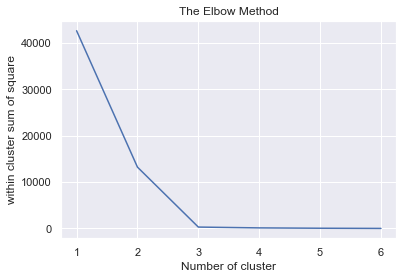

In [16]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('within cluster sum of square')
plt.show()

Optimal value of k should be 3, which is coincidentally what we took initially.